In [1]:
pip install yfinance matplotlib seaborn pandas numpy

  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.18.1.tar.gz (3.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 43.4 MB/s eta 0:00:00
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.18.1-cp313-cp313-macosx_11_0_arm64.whl size=262646 sha256=3bcf9f54f5af27f224085fc46dcbcef65517cf8678e705d8861ff48482a8ab75
  Stored in directory: /Users/zeyushen/Library/Caches/pip/wheels/91/08/75/7ec051c4c2b139cc4aa3a4ae6059d80900c301473b215aad59
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [yfinance]6/7 [yfinance]s]
Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Define tickers
high_risk = ['TSLA', 'NVDA', 'ARKK', 'COIN', 'PLTR']
low_risk = ['JNJ', 'PG', 'KO', 'MSFT', 'BRK-B']
all_tickers = high_risk + low_risk
# Download 1-year daily adjusted close prices
data = yf.download(all_tickers, start='2024-06-01', end='2025-06-20',auto_adjust = True)['Close']
daily_returns = data.pct_change().dropna()
# Compute stats
stats = pd.DataFrame(index=all_tickers)
stats['Mean Daily Return'] = daily_returns.mean()
stats['Volatility (Std Dev)'] = daily_returns.std()
stats['Annualized Return'] = (1 + daily_returns.mean())**252 - 1
stats['Annualized Volatility'] = daily_returns.std() * np.sqrt(252)
# Separate by risk category
high_risk_stats = stats.loc[high_risk]
low_risk_stats = stats.loc[low_risk]
display(high_risk_stats)
display(low_risk_stats)

[*********************100%***********************]  10 of 10 completed


,Mean Daily Return,Volatility (Std Dev),Annualized Return,Annualized Volatility
TSLA,0.003351,0.046064,1.323545,0.731240
NVDA,0.001563,0.036352,0.482177,0.577075
ARKK,0.002092,0.028550,0.693131,0.453212
COIN,0.002342,0.054099,0.803011,0.858788
PLTR,0.008227,0.045370,6.883636,0.720222


,Mean Daily Return,Volatility (Std Dev),Annualized Return,Annualized Volatility
JNJ,0.000269,0.011772,0.070184,0.186870
PG,0.000008,0.012027,0.001907,0.190925
KO,0.000561,0.010631,0.151768,0.168762
MSFT,0.000727,0.015846,0.200878,0.251540
BRK-B,0.000676,0.012290,0.185611,0.195104


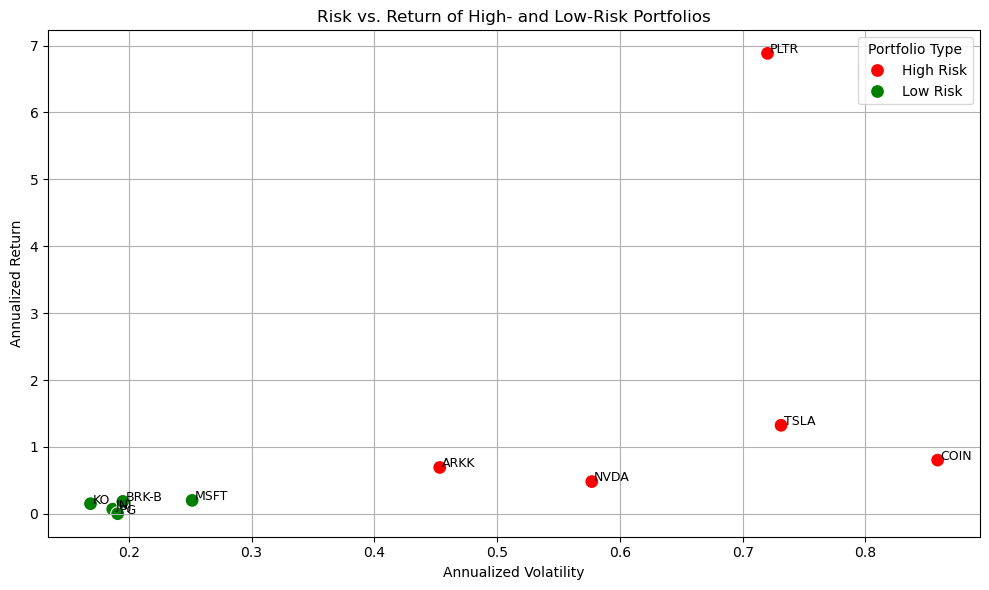

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Identify which stocks are in which portfolio
portfolio_labels = ['High Risk' if ticker in high_risk else 'Low Risk' for ticker in stats.index]
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annualized Volatility',
    y='Annualized Return',
    data=stats,
    hue=portfolio_labels,  # this creates the legend
    palette={'High Risk': 'red', 'Low Risk': 'green'},
    s=100
)

# Add ticker labels next to points
for ticker in stats.index:
    plt.text(
        x=stats.loc[ticker, 'Annualized Volatility'] + 0.002,
        y=stats.loc[ticker, 'Annualized Return'] + 0.002,
        s=ticker,
        fontsize=9
    )

# Titles and labels
plt.title('Risk vs. Return of High- and Low-Risk Portfolios')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

# Grid, legend, and layout
plt.grid(True)
plt.legend(title='Portfolio Type')
plt.tight_layout()
plt.show()

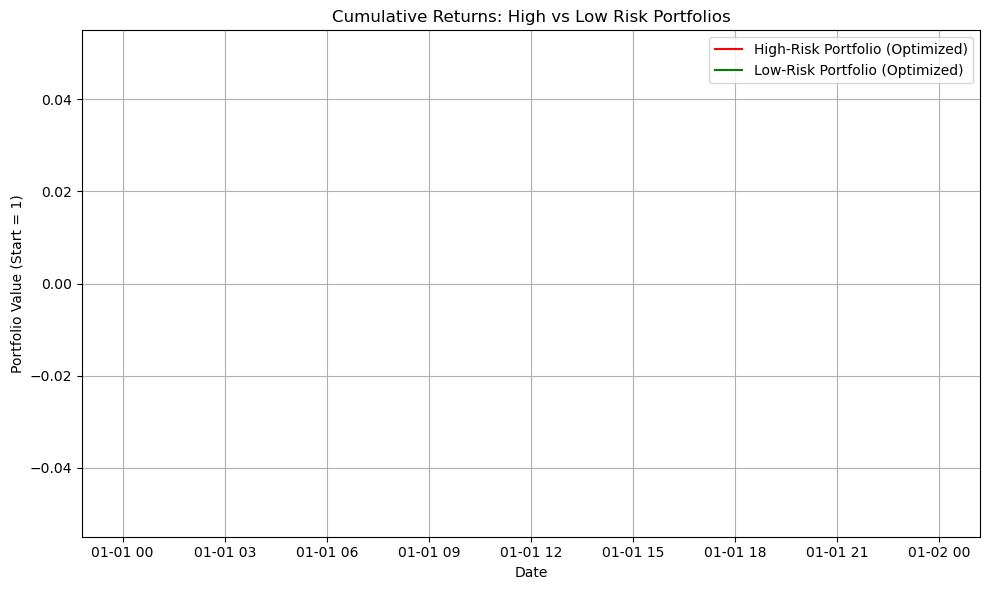

In [18]:
# Daily portfolio returns
high_portfolio_returns = high_returns.dot(weights_high)
low_portfolio_returns = low_returns.dot(weights_low)
# Compute cumulative returns
cumulative_high = (1 + high_portfolio_returns).cumprod()
cumulative_low = (1 + low_portfolio_returns).cumprod()
# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cumulative_high, label='High-Risk Portfolio (Optimized)', color='red')
plt.plot(cumulative_low, label='Low-Risk Portfolio (Optimized)', color='green')
plt.title('Cumulative Returns: High vs Low Risk Portfolios')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (Start = 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
from scipy.optimize import minimize
# Use risk-free rate (e.g. 5% annually)
risk_free_rate = 0.05
trading_days = 252
def optimize_portfolio(returns):
    mean_returns = returns.mean() * trading_days
    cov_matrix = returns.cov() * trading_days
    num_assets = len(mean_returns)
def sharpe_ratio(weights):
        port_return = np.dot(weights, mean_returns)
        port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return -(port_return - risk_free_rate) / port_vol  # negative for minimization
        constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
        bounds = tuple((0, 1) for _ in range(num_assets))
        init_guess = num_assets * [1. / num_assets]
        result = minimize(sharpe_ratio, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)
        return result.x  # optimized weights
# Get sub-returns for each portfolio
high_returns = daily_returns[high_risk]
low_returns = daily_returns[low_risk]

# Optimize
opt_weights_high = optimize_portfolio(high_returns)
opt_weights_low = optimize_portfolio(low_returns)
# Create Series for convenience
weights_high = pd.Series(opt_weights_high, index=high_risk)
weights_low = pd.Series(opt_weights_low, index=low_risk)
display(weights_high)
display(weights_low)

TSLA   NaN
NVDA   NaN
ARKK   NaN
COIN   NaN
PLTR   NaN
dtype: float64

JNJ     NaN
PG      NaN
KO      NaN
MSFT    NaN
BRK-B   NaN
dtype: float64

In [26]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd

risk_free_rate = 0.05
trading_days = 252
def optimize_portfolio(returns):
    mean_returns = returns.mean() * trading_days
    cov_matrix = returns.cov() * trading_days
    num_assets = len(mean_returns)

    # Inner function to minimize (negative Sharpe ratio)
    def sharpe_ratio(weights):
        port_return = np.dot(weights, mean_returns)
        port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return -(port_return - risk_free_rate) / port_vol  # negative for minimization

    # Constraints: sum of weights = 1
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

    # Bounds: weights between 0 and 1
    bounds = tuple((0, 1) for _ in range(num_assets))
# Initial guess: equal weights
    init_guess = num_assets * [1. / num_assets]

    # Run optimizer
    result = minimize(sharpe_ratio, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x  # optimized weights

# Assuming daily_returns, high_risk, low_risk are defined

# Get returns subset for each portfolio
high_returns = daily_returns[high_risk]
low_returns = daily_returns[low_risk]

# Optimize weights
opt_weights_high = optimize_portfolio(high_returns)
opt_weights_low = optimize_portfolio(low_returns)

# Convert to Series for easier handling
weights_high = pd.Series(opt_weights_high, index=high_risk)
weights_low = pd.Series(opt_weights_low, index=low_risk)

display(weights_high)
display(weights_low)
# Align weights index with returns columns before dot product
weights_high = weights_high.reindex(high_returns.columns)
weights_low = weights_low.reindex(low_returns.columns)

# Calculate portfolio daily returns
high_portfolio_returns = high_returns.dot(weights_high)
low_portfolio_returns = low_returns.dot(weights_low)

print(high_portfolio_returns.head())
print(low_portfolio_returns.head())

TSLA    0.0
NVDA    0.0
ARKK    0.0
COIN    0.0
PLTR    1.0
dtype: float64

JNJ      0.000000e+00
PG       2.028110e-16
KO       4.421599e-01
MSFT     2.954602e-01
BRK-B    2.623798e-01
dtype: float64

Date
2024-06-04    0.036585
2024-06-05    0.038914
2024-06-06    0.036150
2024-06-07   -0.020177
2024-06-10   -0.007722
dtype: float64
Date
2024-06-04    0.005591
2024-06-05    0.005705
2024-06-06    0.002734
2024-06-07   -0.000435
2024-06-10   -0.001257
dtype: float64


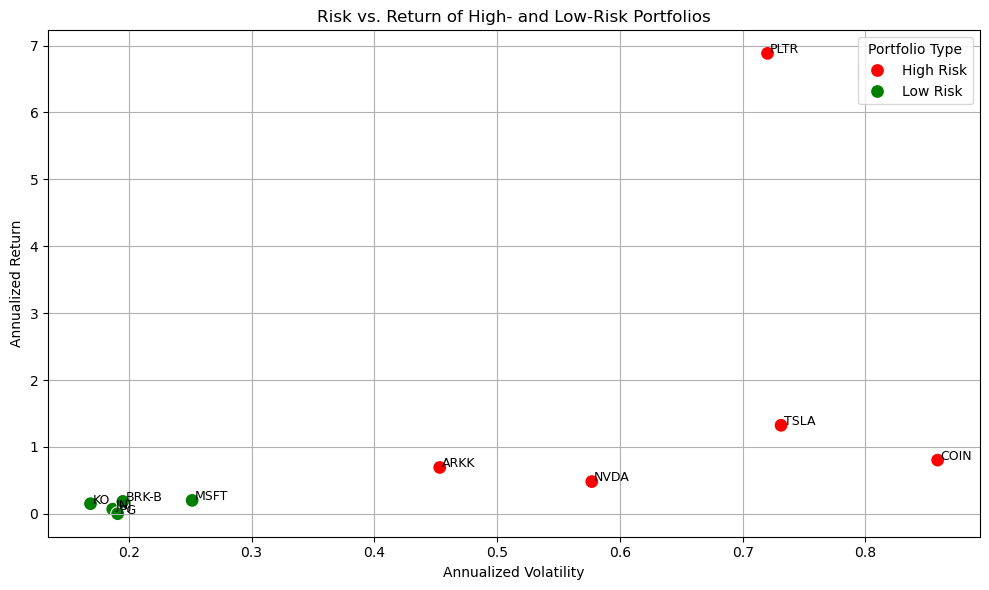

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# Identify which stocks are in which portfolio
portfolio_labels = ['High Risk' if ticker in high_risk else 'Low Risk' for ticker in stats.index]
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annualized Volatility',
    y='Annualized Return',
    data=stats,
    hue=portfolio_labels,  # this creates the legend
    palette={'High Risk': 'red', 'Low Risk': 'green'},
    s=100
)

# Add ticker labels next to points
for ticker in stats.index:
    plt.text(
        x=stats.loc[ticker, 'Annualized Volatility'] + 0.002,
        y=stats.loc[ticker, 'Annualized Return'] + 0.002,
        s=ticker,
        fontsize=9
    )

# Titles and labels
plt.title('Risk vs. Return of High- and Low-Risk Portfolios')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

# Grid, legend, and layout
plt.grid(True)
plt.legend(title='Portfolio Type')
plt.tight_layout()
plt.show()

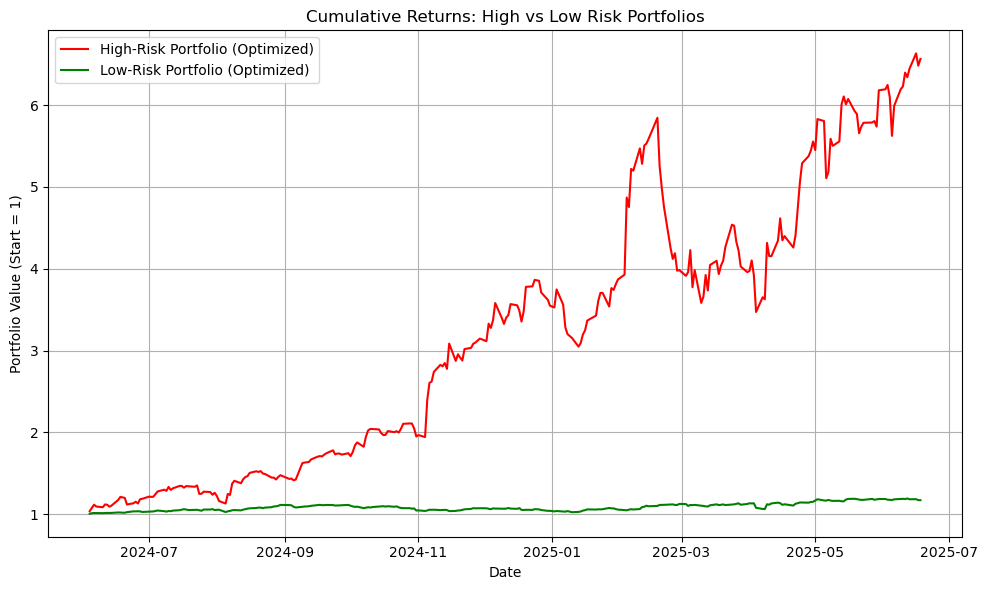

In [30]:
# Daily portfolio returns
high_portfolio_returns = high_returns.dot(weights_high)
low_portfolio_returns = low_returns.dot(weights_low)

# Compute cumulative returns
cumulative_high = (1 + high_portfolio_returns).cumprod()
cumulative_low = (1 + low_portfolio_returns).cumprod()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cumulative_high, label='High-Risk Portfolio (Optimized)', color='red')
plt.plot(cumulative_low, label='Low-Risk Portfolio (Optimized)', color='green')
plt.title('Cumulative Returns: High vs Low Risk Portfolios')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (Start = 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()